In [1]:
import pandas as pd
data1 = pd.read_csv('./01_제공데이터_update(210811)/01_음식물쓰레기_FOOD_WASTE_210811_update.csv', encoding='cp949')
data5 = pd.read_csv('./01_제공데이터_update(210811)/03_거주인구_RESIDENT_POP.csv', encoding='cp949')


/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['font.size'] = 8

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
/home/duhyeong.lee/.cache/matplotlib
['sans-serif']
10.0


In [148]:
temp5 = data5.copy()
temp5['base_year'] = temp5['base_year'].astype(str)
temp5['base_month'] = temp5['base_month'].astype(str)
def p_zero(x):
    if len(x)==1:
        return '0' + str(x)
    else:
        return str(x)

In [149]:
temp5['base_month']=temp5['base_month'].apply(lambda x: p_zero(x))

In [150]:
temp5['year_month'] = temp5['base_year'] + '-' + temp5['base_month']

In [151]:
temp5 = temp5.groupby(['emd_nm', 'year_month']).sum().reset_index()

In [152]:
temp5

,emd_nm,year_month,emd_cd,resid_reg_pop,foreign_pop,total_pop
0,건입동,2018-01,100221180,9800,228,10028
1,건입동,2018-02,100221180,9814,224,10038
2,건입동,2018-03,100221180,9783,222,10005
3,건입동,2018-04,100221180,9788,229,10017
4,건입동,2018-05,100221180,9800,238,10038
...,...,...,...,...,...,...
1801,효돈동,2021-02,100261100,5289,65,5354
1802,효돈동,2021-03,100261100,5262,61,5323
1803,효돈동,2021-04,100261100,5267,59,5326
1804,효돈동,2021-05,100261100,5266,60,5326


In [75]:
emd_list = set(temp5.emd_nm)
year_month_list = set(temp5.year_month)
corr_data = pd.DataFrame(columns = sorted(emd_list))
for i in emd_list:
    temp = temp5[temp5.emd_nm == i]
    corr_data.loc[:,i] = temp.T.loc['total_pop'].reset_index(drop=True).astype(int)
        

In [76]:
corr_data.loc[:,i]

0     9269
1     9276
2     9307
3     9337
4     9406
5     9437
6     9439
7     9416
8     9416
9     9437
10    9428
11    9447
12    9446
13    9455
14    9484
15    9501
16    9461
17    9476
18    9478
19    9458
20    9423
21    9432
22    9427
23    9405
24    9414
25    9416
26    9409
27    9377
28    9403
29    9467
30    9487
31    9488
32    9457
33    9453
34    9414
35    9422
36    9430
37    9463
38    9436
39    9465
40    9486
41    9495
Name: 한경면, dtype: int64

In [ ]:
nat_list = set(temp11_m.nationality)
year_month_list = set(temp5.year_month)
corr_data = pd.DataFrame(columns = sorted(nat_list))
for i in nat_list:
    temp = temp11_m[temp11_m.nationality == i]
    corr_data.loc[:,i] = temp.T.loc['total_pop'].reset_index(drop=True).astype(int)
        

In [77]:
corr_data

,건입동,구좌읍,남원읍,노형동,대륜동,대정읍,대천동,도두동,동홍동,봉개동,...,조천읍,중문동,중앙동,천지동,추자면,표선면,한경면,한림읍,화북동,효돈동
0,10028,16126,19740,54958,13651,22603,13404,3124,23959,4003,...,23982,10975,4106,3643,2225,12662,9269,24419,25516,5407
1,10038,16163,19777,55033,13699,22630,13496,3134,23982,4037,...,24031,11036,4070,3634,2244,12683,9276,24427,25429,5401
2,10005,16148,19806,55000,13851,22670,13592,3150,23963,4052,...,24111,11085,4046,3629,2208,12681,9307,24532,25466,5399
3,10017,16158,19836,55138,13870,22720,13596,3133,23960,4057,...,24197,11145,4048,3626,2189,12716,9337,24606,25430,5394
4,10038,16204,19890,55445,13920,22816,13597,3131,23948,4056,...,24276,11193,4044,3671,2160,12735,9406,24715,25451,5402
5,10031,16261,19930,55580,13957,22772,13597,3150,23994,4054,...,24350,11275,4044,3665,2176,12753,9437,24768,25465,5403
6,10033,16316,19890,55618,14038,22794,13754,3201,24033,4086,...,24480,11369,4046,3665,2161,12800,9439,24789,25459,5417
7,10020,16285,19877,55695,14058,23187,13767,3210,24053,4101,...,24529,11397,4020,3676,2170,12786,9416,24885,25404,5424
8,9992,16296,19874,55759,14101,23157,13811,3213,24110,4127,...,24594,11446,4032,3680,2167,12799,9416,24913,25410,5417
9,9953,16286,19831,56008,14127,23131,13877,3253,24124,4146,...,24625,11437,4024,3682,2152,12856,9437,24933,25366,5386


In [78]:
import pandas as pd
import scipy.cluster.hierarchy as spc

In [226]:
corr = corr_data.corr().values

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.3 * pdist.max(), 'distance')

In [242]:
temp_emd = list(set(temp5['emd_nm','cluster']))
pd.DataFrame([temp_emd, list(idx)]).T.to_csv('correlation.csv', encoding='utf-8-sig')

In [247]:
set(temp5[temp5.cluster==1]['emd_nm'])

{'건입동',
 '남원읍',
 '삼도1동',
 '삼도2동',
 '송산동',
 '용담1동',
 '용담2동',
 '우도면',
 '이도1동',
 '일도1동',
 '일도2동',
 '정방동',
 '중앙동',
 '추자면',
 '화북동',
 '효돈동'}

In [255]:
temp_emd = []
temp_cluster = []
def flatten(t):
    return [item for sublist in t for item in sublist]
for i in range(1,5):
    temp = list(set(temp5[temp5.cluster==i]['emd_nm']))
    temp_emd.append(temp)
    temp_cluster.append(flatten(list(np.repeat(str(i), len(temp)))))

In [261]:
temp5.groupby(['emd_nm', 'cluster']).sum().reset_index()[['emd_nm', 'cluster']].to_csv('correlation.csv', encoding='utf-8-sig')

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


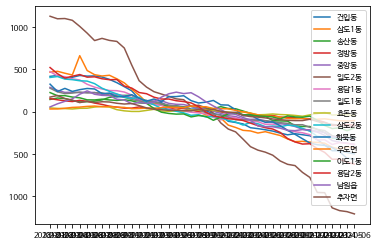

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


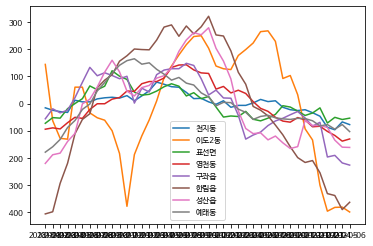

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


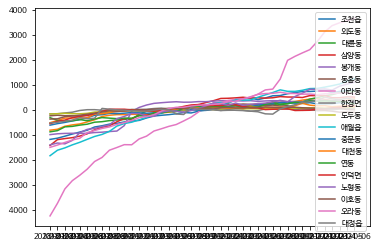

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


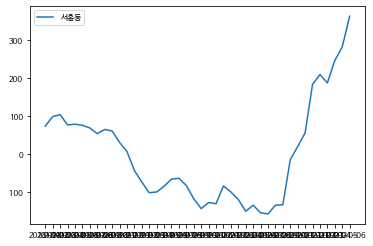

In [228]:
def flatten(t):
    return [item for sublist in t for item in sublist]

n = 0
temp5['cluster'] = 0
temp_cluster = []
for i in set(temp5['emd_nm']):
    temp_cluster.append(list(np.repeat(idx[n], len(temp5[temp5['emd_nm']==i]))))
    n+=1

temp5['cluster'] = flatten(temp_cluster)
for i in set(temp5['cluster']):
    temp = temp5[temp5['cluster']==i]
    for j in set(temp['emd_nm']):
        temp_1 = temp[temp['emd_nm'] == j]
        plt.plot(temp_1.year_month, temp_1.total_pop-temp_1.total_pop.mean(), label = j)
    plt.legend()
    plt.show()

In [163]:
def flatten(t):
    return [item for sublist in t for item in sublist]

n = 0
temp5['cluster'] = 0
temp_cluster = []
for i in set(temp5['emd_nm']):
    temp_cluster.append(list(np.repeat(idx[n], len(temp5[temp5['emd_nm']==i]))))
    n+=1
temp5['cluster'] = flatten(temp_cluster)

<Figure size 2880x1440 with 0 Axes>

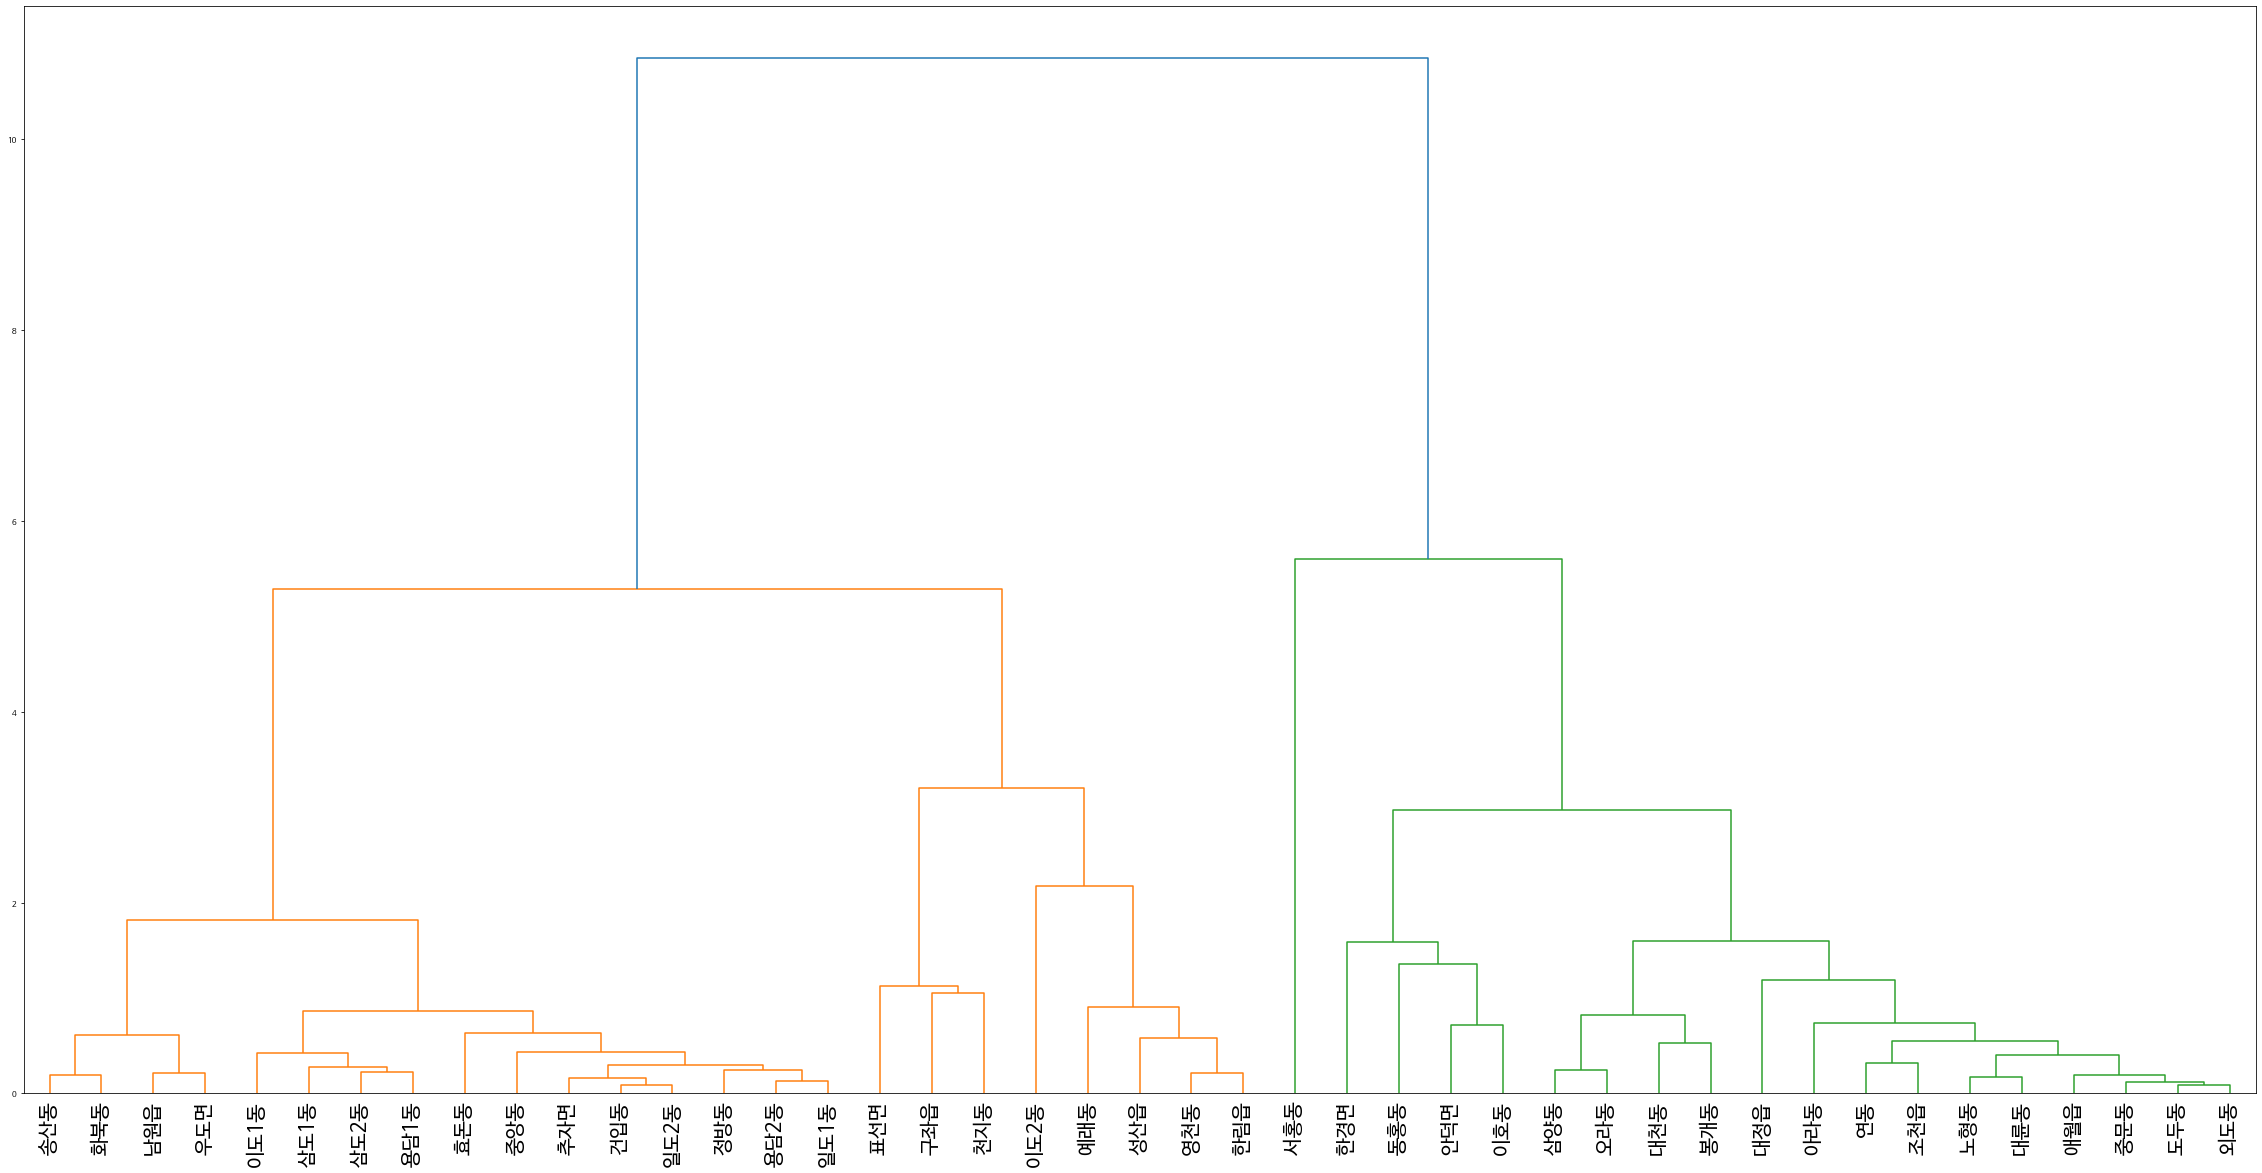

In [84]:
plt.figure(figsize=(40,20))
spc.dendrogram(linkage,
           labels = corr_data.columns,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [114]:
idx = spc.fcluster(linkage,0.4*pdist.max(), 'distance')
idx.astype(int)

array([1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 4, 2, 1, 3, 3, 3, 3, 2, 2,
       3, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1])

In [89]:
import pandas as pd
data2 = pd.read_csv('./01_제공데이터_update(210811)/02-1_내국인유동인구_KOREAN.csv', encoding='cp949')

In [90]:
def get_year_month(x):
    return x[0:7]

In [94]:
data2['year_month'] = data2['base_date'].apply(lambda x: get_year_month(x))
temp2 = data2.copy()
temp2 = temp2.groupby(['emd_nm','year_month','resd']).sum().reset_index()

In [96]:
temp2 = temp2[temp2['resd']=='그외']

In [98]:
temp2 = temp2.reset_index(drop=True)

In [99]:
temp2

,emd_nm,year_month,resd,time,emd_cd,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,건입동,2018-01,그외,166684,668174607060,531330,0.0,69196.7999,1.669592e+06
1,건입동,2018-02,그외,151144,605937254280,483540,0.0,48775.0653,1.401622e+06
2,건입동,2018-03,그외,167206,670479694200,535200,0.0,78999.5815,1.454294e+06
3,건입동,2018-04,그외,162000,649433246400,518400,0.0,65250.4828,1.584295e+06
4,건입동,2018-05,그외,167208,670279251840,534480,0.0,80358.0627,1.558637e+06
...,...,...,...,...,...,...,...,...,...
1801,효돈동,2021-02,그외,150648,603170777600,483520,0.0,17077.0941,4.354521e+05
1802,효돈동,2021-03,그외,160676,641871562200,530640,0.0,19257.0979,3.956454e+05
1803,효돈동,2021-04,그외,160250,643876784200,517540,0.0,24472.8058,4.776103e+05
1804,효돈동,2021-05,그외,166758,669643886900,535370,0.0,21599.4164,5.087552e+05


In [101]:
emd_list = set(temp2.emd_nm)
year_month_list = set(temp2.year_month)
corr_data_2 = pd.DataFrame(columns = sorted(emd_list))
for i in emd_list:
    temp = temp2[temp2.emd_nm == i]
    corr_data_2.loc[:,i] = temp.T.loc['visit_pop_cnt'].reset_index(drop=True).astype(int)
        

In [196]:
corr_2 = corr_data_2.corr().values

pdist_2 = spc.distance.pdist(corr_2)
linkage_2 = spc.linkage(pdist_2, method='complete')
idx_2 = spc.fcluster(linkage_2, 0.7 * pdist_2.max(), 'distance')

In [195]:
spc.fcluster(linkage_2, 0.7 * pdist_2.max(), 'distance')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2],
      dtype=int32)

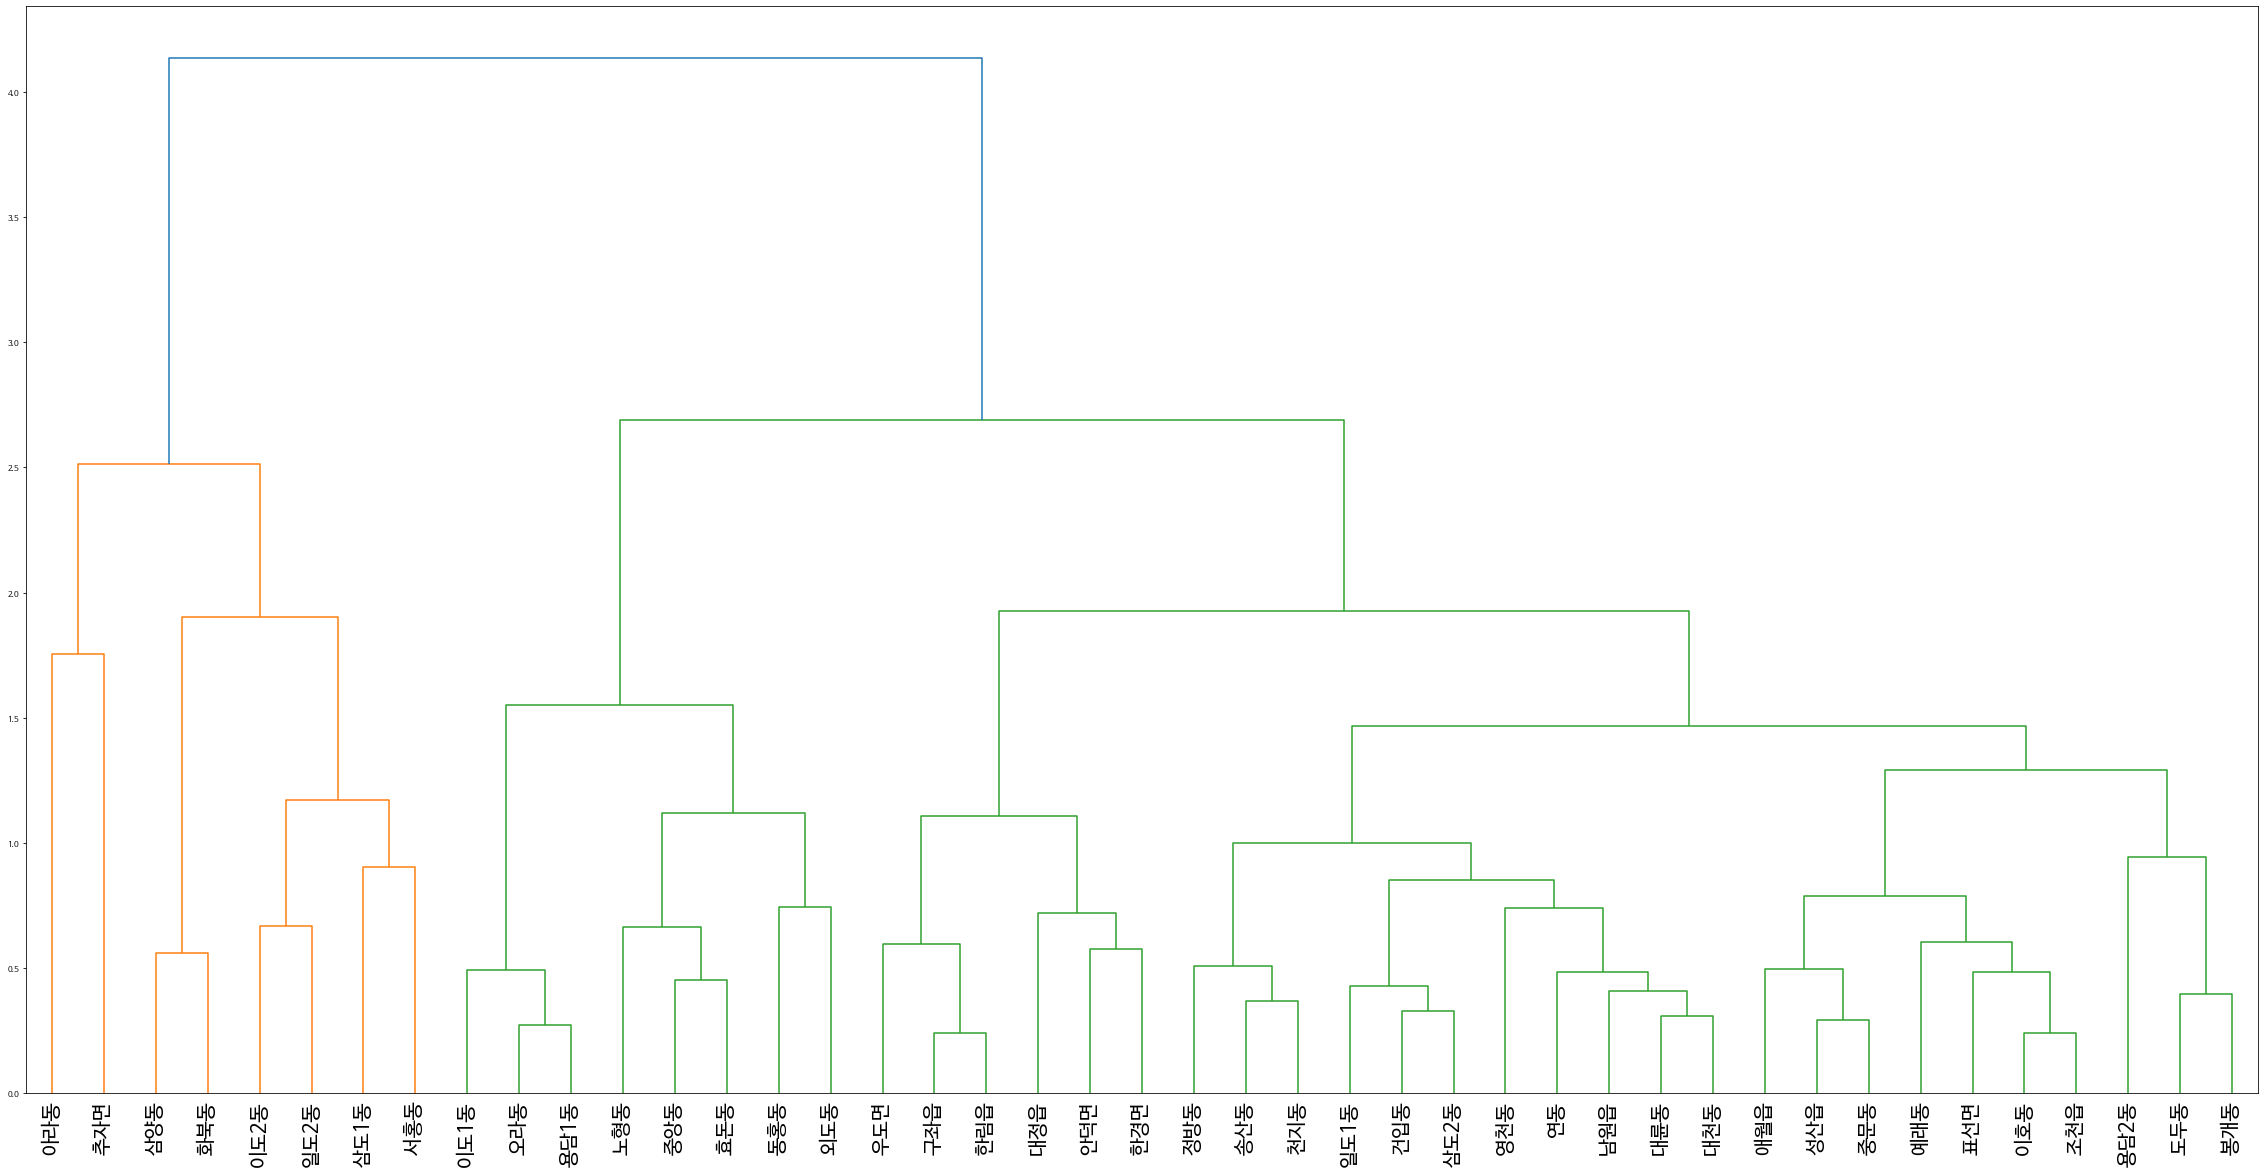

In [189]:
plt.figure(figsize=(40,20))
spc.dendrogram(linkage_2,
           labels = corr_data_2.columns,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


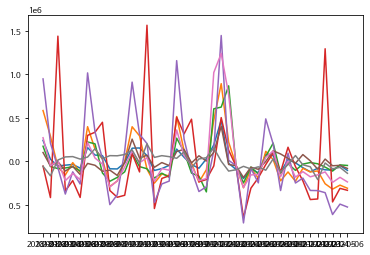

/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/duhyeong.lee/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


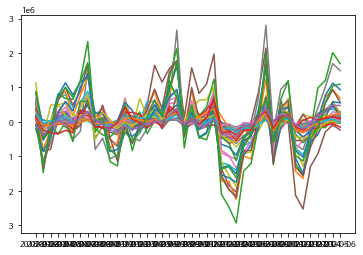

In [197]:
def flatten(t):
    return [item for sublist in t for item in sublist]

n = 0
temp2['cluster'] = 0
temp_cluster = []
for i in set(temp2['emd_nm']):
    temp_cluster.append(list(np.repeat(idx_2[n], len(temp2[temp2['emd_nm']==i]))))
    n+=1

temp2['cluster'] = flatten(temp_cluster)
for i in set(temp2['cluster']):
    temp = temp2[temp2['cluster']==i]
    for j in set(temp['emd_nm']):
        temp_1 = temp[temp['emd_nm'] == j]
        plt.plot(temp_1.year_month, temp_1.visit_pop_cnt-temp_1.visit_pop_cnt.mean(), label = j)
    plt.show()

In [174]:
idx

array([1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 4, 2, 1, 3, 3, 3, 3, 2, 2,
       3, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1],
      dtype=int32)

In [199]:
spc.fcluster(linkage_2, 0.7 * pdist_2.max(), 'distance')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2],
      dtype=int32)